<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Tamil/ULMFiT_Tamil_transliterated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train1=pd.read_csv('/content/output_tamil_tran.csv', engine='python')
train1

,Unnamed: 0,Unnamed: 0.1,text,category,trans
0,0,0,Vani bhojam fans hit like solli 500 like Vangi...,unknown_state,{'ta': 'வாணி பூஜாம் பான்ஸ் ஹிட் லிக் சொல்லி 50...
1,1,1,I love you ajith very I like,Positive,{'ta': 'ஐஸ் லோவ் யூ அஜித் வேரி ஐஸ் லிக்'}
2,2,2,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...,Positive,{'ta': 'எண்ணய டிரைலர் கூ முடி எல்லம் நிக்குது....
3,3,3,Vijay Annaa Ur Maassssss Therrrrriiiiii,Positive,{'ta': 'விஜய் அன்னா உர் மாசஸ் தெற்றி'}
4,4,4,நம்ப நடே நாசாமா தான் போச்சி,Negative,{'ta': 'நம்ப நடே நாசாமா தான் போச்சி'}
...,...,...,...,...,...
35651,35651,35651,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,Mixed_feelings,{'ta': 'ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி...
35652,35652,35652,Repeated Mode to Watching Theri Trailer & Ther...,Positive,{'ta': 'ரிப்பியட்டா மோடு டோ வாட்சிங் தேரி டிரை...
35653,35653,35653,yeevanikuachu pula kutti erudhal oodi poyidu....,Negative,{'ta': 'எவனிகுசு புல குட்டி ஏறுதல் ஓடி போயிடு....
35654,35654,35654,She is looking like laughing budha,Positive,{'ta': 'ஷே ஐஸ் லூகிங் லிக் லூகிங் புத'}


In [5]:
for i in range(len(train1)):
  train1['trans'][i]=train1['trans'][i][8:-2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
for i in range(len(train1)):
  if train1['category'][i]=='not-Tamil':
    train1['trans'][i]='NaN'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
train=pd.DataFrame(columns=['category','text'])
train['category']=train1['category'].append(train1['category'])
train['text']=train1['text'].append(train1['trans'])
train

,category,text
0,unknown_state,Vani bhojam fans hit like solli 500 like Vangi...
1,Positive,I love you ajith very I like
2,Positive,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...
3,Positive,Vijay Annaa Ur Maassssss Therrrrriiiiii
4,Negative,நம்ப நடே நாசாமா தான் போச்சி
...,...,...
35651,Mixed_feelings,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...
35652,Positive,ரிப்பியட்டா மோடு டோ வாட்சிங் தேரி டிரைலர் & தே...
35653,Negative,எவனிகுசு புல குட்டி ஏறுதல் ஓடி போயிடு. மவானி க...
35654,Positive,ஷே ஐஸ் லூகிங் லிக் லூகிங் புத


In [8]:
train=train.dropna()

In [10]:
val=pd.read_csv('/content/tamil_sentiment_full_dev.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,text,category
0,@0:40 songsuperb..kamallllla.. I'm waiting fo...,unknown_state
1,கணத்ததோர் அகமுடையார் சார்பாக படம் வெற்றி அடைய...,Positive
2,Thalavia neenga veera level boss and neega tha...,Positive
3,Oru padam patha fell.vera level music,Positive
4,Hairstyle than mattama iruku. Adhu mattum math...,unknown_state
...,...,...
3957,நாடக காதல் மிகப்பெரிய தவறு. இதை தான் இந்த படம்...,Positive
3958,So long to see you suriya,not-Tamil
3959,Super sK ettan adipoli makkalle dec20 waiti...,Mixed_feelings
3960,Minimum 50m viewa vara veppoma all thala fans,Positive


In [11]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [12]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [13]:
punc(df)
punc(df_test)

             category                                               text
0       unknown_state  Vani bhojam fans hit like solli 500 like Vangi...
1            Positive                       I love you ajith very I like
2            Positive  ennaya trailer Ku mudi Ellam nikkudhu... Vera ...
3            Positive           Vijay Annaa  Ur Maassssss Therrrrriiiiii
4            Negative                        நம்ப நடே நாசாமா தான் போச்சி
...               ...                                                ...
35651  Mixed_feelings  ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...
35652        Positive  ரிப்பியட்டா மோடு டோ வாட்சிங் தேரி டிரைலர் & தே...
35653        Negative  எவனிகுசு புல குட்டி ஏறுதல் ஓடி போயிடு. மவானி க...
35654        Positive                      ஷே ஐஸ் லூகிங் லிக் லூகிங் புத
35655        Positive               நோர்த் ஓர் சௌத் கிப் ஐஸ் தே பெஸ்ட்!!

[71312 rows x 2 columns]
            category                                               text
0      unknown_state  0:40

In [14]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [15]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [16]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (71312 items)
x: LMTextList
xxbos xxmaj vani xxunk fans hit like solli 500 like xxmaj xxunk xxmaj vendiyathu than,xxbos i love you ajith very i like,xxbos ennaya trailer xxmaj ku mudi xxmaj ellam nikkudhu ... xxmaj vera level trailer ..,xxbos xxmaj vijay xxmaj annaa xxmaj ur xxmaj maa xxrep 6 s xxmaj the xxrep 5 r xxrep 6 i,xxbos நம்ப நடே நாசாமா தான் போச்சி
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (3962 items)
x: LMTextList
xxbos 0:40 xxunk .. kama xxrep 5 l a .. i 'm waiting for dis song .. you,xxbos கணத்ததோர் அகமுடையார் சார்பாக படம் வெற்றி அடைய வாழ்த்துகள்,xxbos xxmaj xxunk neenga veera level boss and neega thaan marana mass,xxbos xxmaj oru padam patha xxunk level music,xxbos xxmaj hairstyle than mattama iruku . xxmaj adhu mattum xxunk . xxmaj teaser xxunk vettaikaran padam maari theridhu .
y: LMLabelList
,,,,
Path: .;

Test: None>

In [17]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 6.31E-02


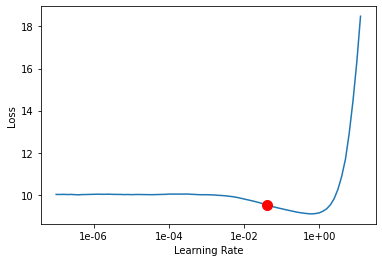

In [18]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)


In [19]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,6.264684,5.292267,0.250941,01:15
1,5.144098,5.021248,0.272624,01:15


In [20]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.877855,4.968112,0.274936,01:28
1,4.439626,4.858119,0.289716,01:28
2,3.629683,4.936435,0.289238,01:28


In [21]:
learn.freeze_to(-1)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-04
Min loss divided by 10: 3.02E-04


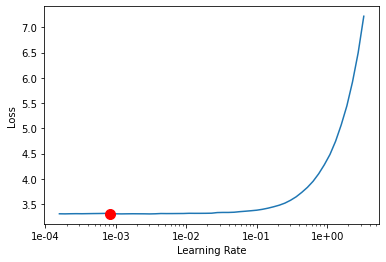

In [22]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [23]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,3.506536,4.993711,0.285985,01:16
1,3.330606,5.009694,0.285635,01:16
2,3.016698,5.024745,0.285172,01:16


In [24]:
learn.freeze_to(-2)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-04
Min loss divided by 10: 2.75E-05


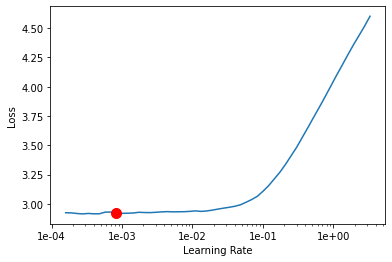

In [25]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [26]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,3.086748,5.166979,0.278364,01:17
1,2.974484,5.204131,0.277886,01:17
2,2.705138,5.275646,0.276164,01:17


In [27]:
#save the encoder model
learn.save_encoder('my_encoder')

In [28]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [29]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (71312 items)
x: TextList
xxbos xxmaj vani xxunk fans hit like solli 500 like xxmaj xxunk xxmaj vendiyathu than,xxbos i love you ajith very i like,xxbos ennaya trailer xxmaj ku mudi xxmaj ellam nikkudhu ... xxmaj vera level trailer ..,xxbos xxmaj vijay xxmaj annaa xxmaj ur xxmaj maa xxrep 6 s xxmaj the xxrep 5 r xxrep 6 i,xxbos நம்ப நடே நாசாமா தான் போச்சி
y: CategoryList
unknown_state,Positive,Positive,Positive,Negative
Path: .;

Valid: LabelList (3962 items)
x: TextList
xxbos 0:40 xxunk .. kama xxrep 5 l a .. i 'm waiting for dis song .. you,xxbos கணத்ததோர் அகமுடையார் சார்பாக படம் வெற்றி அடைய வாழ்த்துகள்,xxbos xxmaj xxunk neenga veera level boss and neega thaan marana mass,xxbos xxmaj oru padam patha xxunk level music,xxbos xxmaj hairstyle than mattama iruku . xxmaj adhu mattum xxunk . xxmaj teaser xxunk vettaikaran padam maari theridhu .
y: CategoryList
unknown_state,Positive,Positive,Positive,unknown_state
Path: .;

Test: None, mo

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-01
Min loss divided by 10: 5.25E-02


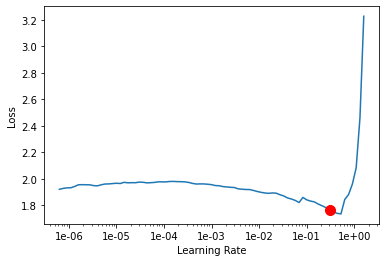

In [30]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [31]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.038358,1.050715,0.591116,0.257006,00:35
1,1.017236,1.006419,0.610045,0.000000,00:33
2,1.030136,1.007082,0.609541,0.000000,00:33


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

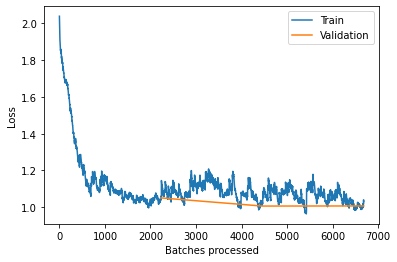

In [32]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 1.00E-04


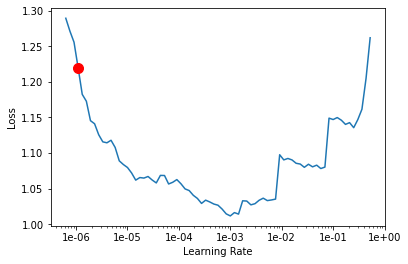

In [33]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [34]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.958252,0.980779,0.612822,0.339766,00:41
1,0.925833,0.957312,0.630742,0.000000,00:42


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-05
Min loss divided by 10: 1.10E-07


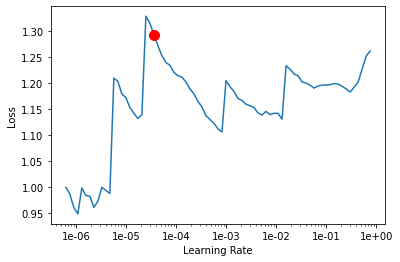

In [35]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [36]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.924546,0.953751,0.635285,0.378172,01:10
1,0.857038,0.930736,0.646138,0.000000,01:04


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [37]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.855546,0.958062,0.639071,0.392220,01:26
1,0.707401,0.958915,0.650429,0.000000,01:31


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.829123,0.966541,0.642100,0.396826,01:49
1,0.757826,1.001797,0.638566,0.000000,01:51


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.582635,1.030233,0.632004,0.401082,01:46
1,0.621388,1.039336,0.635538,0.000000,01:42
2,0.537612,1.070109,0.635285,0.000000,01:51


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [38]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [39]:
pd.crosstab(predictions, targets)

col_0,0,1,2,4,5
row_0,,,,,
0,89,41,73,1,56
1,70,198,131,8,63
2,235,200,1918,52,259
4,4,5,13,94,15
5,40,36,122,21,218


In [40]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[  89   41   73    1   56]
 [  70  198  131    8   63]
 [ 235  200 1918   52  259]
 [   4    5   13   94   15]
 [  40   36  122   21  218]]
0.6352852094901564


In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.2032    0.3423    0.2550       260
           1     0.4125    0.4213    0.4168       470
           2     0.8498    0.7200    0.7795      2664
           4     0.5341    0.7176    0.6124       131
           5     0.3568    0.4989    0.4160       437

    accuracy                         0.6353      3962
   macro avg     0.4713    0.5400    0.4960      3962
weighted avg     0.6907    0.6353    0.6565      3962

